<a href="https://colab.research.google.com/github/donuva/HOUSE_PRICE/blob/main/D%E1%BB%B1_%C4%90o%C3%A1n_Gi%C3%A1_Nh%C3%A0_HOUSE_PRICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ỨNG DỤNG HÀM ĐA CHIỀU(CHƯƠNG 5) VÀO BÀI TOÁN DỰ ĐOÁN GIÁ NHÀ SỬ DỤNG HÀM HỒI QUY TUYẾN TÍNH ĐA BIẾN



### khởi tạo

In [ ]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

### TẢI VÀ IN DATA NHÀ

In [ ]:
data = np.genfromtxt('https://raw.githubusercontent.com/Tan-Moy/medium_articles/master/art2_multivariate_linear_regression/home.txt', delimiter=',')
data = normalize(data, axis=0)
data[4]

array([0.20356914, 0.17906459, 0.217433  ])

### CHIA Data thành X, Y

In [ ]:
X = data[:, 0:2]
Y = data[:, 2:]

### MÔ HÌNH HÓA DATA

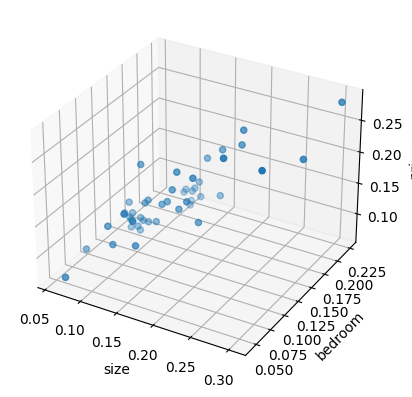

In [ ]:
# Fixing random state for reproducibility
np.random.seed(19680801)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = X[:, 0]
ys = X[:, 1]
zs = Y
ax.scatter(xs, ys, zs)

ax.set_xlabel('size')
ax.set_ylabel('bedroom')
ax.set_zlabel('price')

plt.show()

### SETUP THÔNG SỐ TRƯỚC KHI CHẠY

In [ ]:
mb_learning_rate = 0.09
mb_max_iteration = 500
batch_size = 16

mb_theta = np.zeros((data.shape[1], 1))

### HYPNOTHESIS

In [ ]:
def h (theta, X) :
  tempX = np.ones((X.shape[0], X.shape[1] + 1))
  tempX[:,1:] = X
  return np.matmul(tempX, theta)

### Loss Function

In [ ]:
def loss (theta, X, Y) :
  return np.average(np.square(Y - h(theta, X))) / 2

### Calculate Gradients

In [ ]:
def gradient (theta, X, Y) :
  tempX = np.ones((X.shape[0], X.shape[1] + 1))
  tempX[:,1:] = X
  d_theta = - np.average((Y - h(theta, X)) * tempX, axis= 0)
  d_theta = d_theta.reshape((d_theta.shape[0], 1))
  return d_theta

### Mini-Batch Gradient Descent

In [ ]:
def minibatch_gradient_descent (theta, X, Y, learning_rate, max_iteration, batch_size, gap) :
  cost = np.zeros(max_iteration)
  for i in range(max_iteration) :
    for j in range(0, X.shape[0], batch_size):
      d_theta = gradient (theta, X[j:j+batch_size,:], Y[j:j+batch_size,:])
      theta = theta - learning_rate * d_theta

    cost[i] = loss(theta, X, Y)
    if i % gap == 0 :
      print ('iteration : ', i, ' loss : ', loss(theta, X, Y))
  return theta, cost

### Train Model

In [ ]:
mb_theta, mb_cost = minibatch_gradient_descent (mb_theta, X, Y, mb_learning_rate, mb_max_iteration, batch_size, 100)

iteration :  0  loss :  0.006440267374919575
iteration :  100  loss :  0.001057469055029178
iteration :  200  loss :  0.0009493292161679231
iteration :  300  loss :  0.0008581038563838423
iteration :  400  loss :  0.000781114138803193


### Visualize the Data

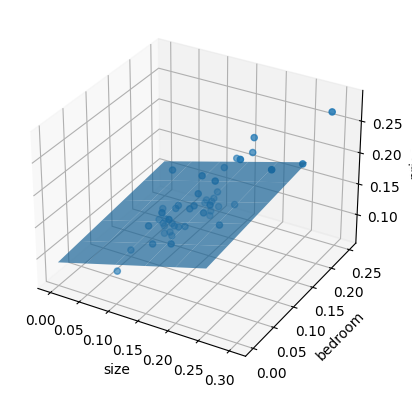

In [ ]:
# Fixing random state for reproducibility
# np.random.seed(19680801)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = y = np.arange(0, 0.3, 0.05)
xp, yp = np.meshgrid(x, y)
z = np.array([h(mb_theta, np.array([[x,y]]))[0, 0] for x,y in zip(np.ravel(xp), np.ravel(yp))])
zp = z.reshape(xp.shape)
ax.plot_surface(xp, yp, zp, alpha=0.7)

xs = X[:, 0]
ys = X[:, 1]
zs = Y
ax.scatter(xs, ys, zs)


ax.set_xlabel('size')
ax.set_ylabel('bedroom')
ax.set_zlabel('price')

plt.show()